In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/72/qffcmmzs6tgf06g63_t_hhy40000gn/T/ipykernel_99355/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Lab | Natural Language Processing
### SMS: SPAM or HAM

### Let's prepare the environment

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

- Read Data for the Fraudulent Email Kaggle Challenge
- Reduce the training set to speead up development. 

In [31]:
## Read Data for the Fraudulent Email Kaggle Challenge
data = pd.read_csv("/Users/julianuss/Documents/GitHub/lab-natural-language-processing/data/kg_train.csv",encoding='latin-1')

# Reduce the training set to speed up development. 
# Modify for final system

print(data.shape)
data.fillna("",inplace=True)

(5964, 2)


### Let's divide the training and test set into two partitions

In [15]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Printing the shape of the datasets
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (800, 2)
Test data shape: (200, 2)


## Data Preprocessing

In [16]:
import nltk
print(nltk.data.path)

['/Users/julianuss/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.12/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.12/share/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.12/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [17]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Download stopwords to the appropriate directory
import nltk
nltk.download('stopwords', download_dir='/Users/julianuss/nltk_data')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/julianuss/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Now, we have to clean the html code removing words

- First we remove inline JavaScript/CSS
- Then we remove html comments. This has to be done before removing regular tags since comments can contain '>' characters
- Next we can remove the remaining tags

In [34]:
import re

def clean_html(text):
    # Remove inline JavaScript/CSS by removing anything between <script>...</script> and <style>...</style>
    text = re.sub(r'<(script|style).*?>.*?(<\/\1>)', '', text, flags=re.DOTALL)

    # Remove HTML comments (anything between <!-- and -->)
    text = re.sub(r'<!--.*?-->', '', text)

    # Remove any remaining HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    return text

# Sample HTML data for testing
sample_html = """
<html>
<head><script>var x = 10;</script><style>body {background-color: #fff;}</style></head>
<body>
<!-- This is a comment -->
<p>This is a paragraph.</p>
</body>
</html>
"""

cleaned_text = clean_html(sample_html)
cleaned_text  # Cleaned text output


'\n\n\n\n\nThis is a paragraph.\n\n\n'

- Remove all the special characters
    
- Remove numbers
    
- Remove all single characters
 
- Remove single characters from the start

- Substitute multiple spaces with single space

- Remove prefixed 'b'

- Convert to Lowercase

In [19]:
# Function to clean the text
def clean_text(text):
    # Remove inline JavaScript/CSS:
    text = re.sub(r'<(script|style).*?>.*?</\1>', '', text, flags=re.DOTALL)
    
    # Remove HTML comments:
    text = re.sub(r'<!--.*?-->', '', text, flags=re.DOTALL)
    
    # Remove the remaining HTML tags:
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and punctuation:
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Remove numbers:
    text = re.sub(r'\d+', '', text)
    
    # Remove all single characters:
    text = re.sub(r'\b\w\b', '', text)
    
    # Remove single characters from the start:
    text = re.sub(r'^[a-zA-Z]\s+', '', text)
    
    # Substitute multiple spaces with a single space:
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove prefixed 'b' (if any, e.g., from binary strings):
    text = re.sub(r'\bb\b', '', text)
    
    # Convert to lowercase:
    text = text.lower()
    
    return text

# Apply the clean_text function to the relevant column (assuming 'text' column holds the data)
data['cleaner_text'] = data['cleaned_text'].apply(clean_text)

# Display the cleaned text for verification
print(data['cleaner_text'].head())

0    dear sir strictly private business proposal am...
1                                              will do
2    noracheryl has emailed dozens of memos about h...
3    dear sirfmadamc know that this proposal might ...
4                                                  fyi
Name: cleaner_text, dtype: object


## Now let's work on removing stopwords
Remove the stopwords.

In [20]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import re

# Downloading stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Function to clean the text and remove stopwords
def clean_text(text):
    # Remove inline JavaScript/CSS:
    text = re.sub(r'<(script|style).*?>.*?</\1>', '', text, flags=re.DOTALL)
    
    # Remove HTML comments:
    text = re.sub(r'<!--.*?-->', '', text, flags=re.DOTALL)
    
    # Remove the remaining HTML tags:
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and punctuation:
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Remove numbers:
    text = re.sub(r'\d+', '', text)
    
    # Remove all single characters:
    text = re.sub(r'\b\w\b', '', text)
    
    # Remove single characters from the start:
    text = re.sub(r'^[a-zA-Z]\s+', '', text)
    
    # Substitute multiple spaces with a single space:
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove prefixed 'b':
    text = re.sub(r'\bb\b', '', text)
    
    # Convert to lowercase:
    text = text.lower()
    
    # Remove stopwords:
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

# Reading the data
data = pd.read_csv("/Users/julianuss/Documents/GitHub/lab-natural-language-processing/data/kg_train.csv", encoding='latin-1')

# Fill missing values with empty strings
data.fillna("", inplace=True)


data['cleaned_text'] = data['text'].apply(clean_text)

# Display the cleaned text for verification
print(data['cleaned_text'].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/julianuss/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    dear sir strictly private business proposal mi...
1                                                     
2    noracheryl emailed dozens memos haiti weekend ...
3    dear sirfmadamc know proposal might surprise e...
4                                                  fyi
Name: cleaned_text, dtype: object


## Tame Your Text with Lemmatization
Break sentences into words, then use lemmatization to reduce them to their base form (e.g., "running" becomes "run"). See how this creates cleaner data for analysis!

In [21]:
import nltk

# Verify the download of necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/julianuss/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/julianuss/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/julianuss/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/julianuss/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [33]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    # Lemmatize each word in the text
    lemmatized_text = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_text)

# Sample text for lemmatization
sample_text = "The boys are playing with the running dogs."
lemmatized_text = lemmatize_text(sample_text)
lemmatized_text


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/julianuss/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'The boy are playing with the running dogs.'

## Bag Of Words
Let's get the 10 top words in ham and spam messages (**EXPLORATORY DATA ANALYSIS**)

Top 10 words in Ham messages: [('state', np.int64(1096)), ('pm', np.int64(875)), ('secretary', np.int64(626)), ('said', np.int64(599)), ('obama', np.int64(558)), ('president', np.int64(537)), ('new', np.int64(503)), ('house', np.int64(473)), ('30', np.int64(450)), ('2009', np.int64(442))]
Top 10 words in Spam messages: [('2e', np.int64(10376)), ('money', np.int64(5650)), ('br', np.int64(5454)), ('2c', np.int64(5249)), ('bank', np.int64(4681)), ('account', np.int64(4533)), ('nbsp', np.int64(3618)), ('div', np.int64(3001)), ('transaction', np.int64(2842)), ('business', np.int64(2658))]


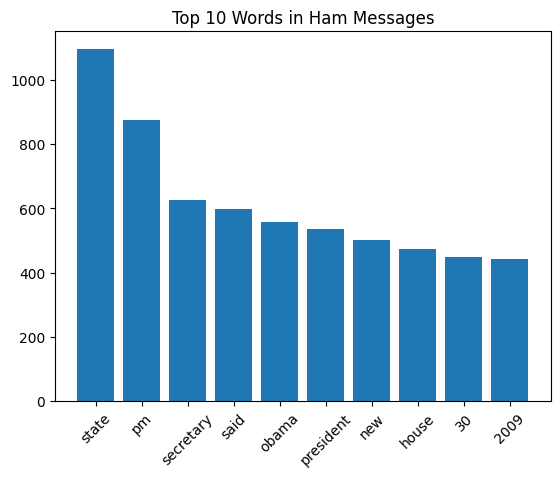

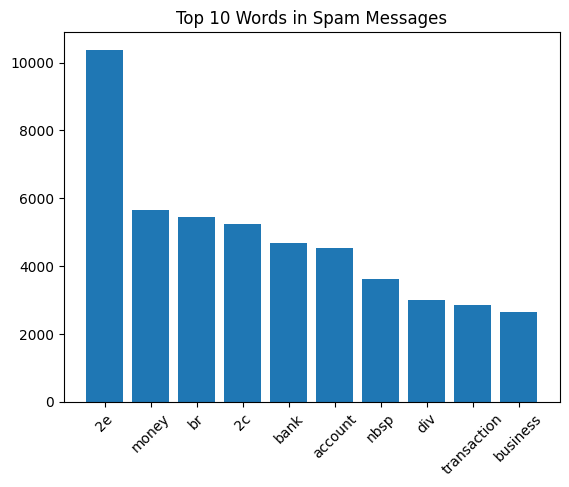

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Assuming the dataset has 'text' and 'label' columns
# Label '0' is ham, '1' is spam

# Fit the CountVectorizer on the entire dataset to ensure consistent vocabulary
vectorizer = CountVectorizer(stop_words='english')
bow = vectorizer.fit_transform(data['text'])

# Separate the data into ham and spam
ham_data = data[data['label'] == 0]
spam_data = data[data['label'] == 1]

# Transform the ham and spam data using the fitted vectorizer
ham_bow = vectorizer.transform(ham_data['text'])
spam_bow = vectorizer.transform(spam_data['text'])

# Sum the occurrences of each word
ham_word_counts = ham_bow.sum(axis=0)
spam_word_counts = spam_bow.sum(axis=0)

# Convert to a list of (word, count) tuples
ham_words_freq = [(word, ham_word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
spam_words_freq = [(word, spam_word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sort by frequency and get the top 10 words for ham and spam
top_ham_words = sorted(ham_words_freq, key=lambda x: x[1], reverse=True)[:10]
top_spam_words = sorted(spam_words_freq, key=lambda x: x[1], reverse=True)[:10]

# Display top 10 words for ham and spam
print("Top 10 words in Ham messages:", top_ham_words)
print("Top 10 words in Spam messages:", top_spam_words)

# Plot the top 10 words in ham messages
ham_words, ham_counts = zip(*top_ham_words)
plt.bar(ham_words, ham_counts)
plt.title('Top 10 Words in Ham Messages')
plt.xticks(rotation=45)
plt.show()

# Plot the top 10 words in spam messages
spam_words, spam_counts = zip(*top_spam_words)
plt.bar(spam_words, spam_counts)
plt.title('Top 10 Words in Spam Messages')
plt.xticks(rotation=45)
plt.show()

## Extra features

In [43]:
# Defining lists of symbols and suspicious words
money_simbol_list = "|".join(["euro", "dollar", "pound", "€", "$"])
suspicious_words = "|".join(["free", "cheap", "sex", "money", "account", "bank", "fund", "transfer", "transaction", "win", "deposit", "password"])

# Add money symbol and suspicious words indicators, and calculate text length
data['money_mark'] = data['text'].str.contains(money_simbol_list, case=False) * 1
data['suspicious_words'] = data['text'].str.contains(suspicious_words, case=False) * 1
data['text_len'] = data['text'].apply(lambda x: len(x))

# Display the first few rows with new indicators
print(data.head())

                                                text  label  money_mark  \
0  DEAR SIR, STRICTLY A PRIVATE BUSINESS PROPOSAL...      1           1   
1                                           Will do.      0           1   
2  Nora--Cheryl has emailed dozens of memos about...      0           1   
3  Dear Sir=2FMadam=2C I know that this proposal ...      1           1   
4                                                fyi      0           1   

   suspicious_words  text_len  
0                 1      2292  
1                 0         8  
2                 0       197  
3                 1      2199  
4                 0         3  


## How would work the Bag of Words with Count Vectorizer concept?

In [44]:
# Importing libraries
from sklearn.feature_extraction.text import CountVectorizer

# Sample text data
documents = [
    'This is a simple example.',
    'This example is a bit more complex.',
    'Bag of Words is a simple technique.'
]

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the model and transform the documents into a bag-of-words representation
X = vectorizer.fit_transform(documents)

# Convert the BoW matrix into an array for easy viewing
X_array = X.toarray()

# Show the vocabulary (words mapped to indices)
vocabulary = vectorizer.vocabulary_

# Display the vocabulary and the BoW matrix
print("Vocabulary:", vocabulary)
print("BoW Matrix:\n", X_array)

Vocabulary: {'this': 9, 'is': 4, 'simple': 7, 'example': 3, 'bit': 1, 'more': 5, 'complex': 2, 'bag': 0, 'of': 6, 'words': 10, 'technique': 8}
BoW Matrix:
 [[0 0 0 1 1 0 0 1 0 1 0]
 [0 1 1 1 1 1 0 0 0 1 0]
 [1 0 0 0 1 0 1 1 1 0 1]]


## TD-IDF

- Load the vectorizer

- Vectorize all dataset

- print the shape of the vetorized dataset

In [45]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents to create the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(data)

# Convert to a DataFrame for easy viewing (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Print the shape of the vectorized dataset
print("Shape of the TF-IDF matrix:", tfidf_matrix.shape)

# Display the TF-IDF values (optional)
print("\nTF-IDF Matrix:")
print(tfidf_df)

Shape of the TF-IDF matrix: (5, 5)

TF-IDF Matrix:
   label  money_mark  suspicious_words  text  text_len
0    0.0         0.0               0.0   1.0       0.0
1    1.0         0.0               0.0   0.0       0.0
2    0.0         1.0               0.0   0.0       0.0
3    0.0         0.0               1.0   0.0       0.0
4    0.0         0.0               0.0   0.0       1.0


## And the Train a Classifier?

In [46]:
# Importing necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data' is your DataFrame and 'text' is the column with text data, 'label' is the target column
# Replace 'data' and column names with your actual dataset variables
documents = data['text']   # The text data
labels = data['label']     # The target labels (0 for ham, 1 for spam)

# Step 1: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)  # Vectorized text (TF-IDF matrix)
y = labels  # Target labels

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a classifier (Logistic Regression in this case)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = classifier.predict(X_test)

# Step 5: Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9656

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       674
           1       1.00      0.92      0.96       519

    accuracy                           0.97      1193
   macro avg       0.97      0.96      0.96      1193
weighted avg       0.97      0.97      0.97      1193



### Extra Task - Implement a SPAM/HAM classifier

https://www.kaggle.com/t/b384e34013d54d238490103bc3c360ce

The classifier can not be changed!!! It must be the MultinimialNB with default parameters!

Your task is to find the **best feature representation**.

You can work with teams of two persons (recommended).

In [48]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Read the data
data = pd.read_csv('/Users/julianuss/Documents/GitHub/lab-natural-language-processing/data/kg_train.csv', encoding='latin-1')
data.fillna("", inplace=True)

# Clean text function
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # Remove single characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)  # Remove single characters at the start
    text = re.sub(r'\s+', ' ', text, flags=re.I)  # Remove multiple spaces
    text = re.sub(r'^b\s+', '', text)  # Remove prefixed 'b'
    return text.lower()

# Apply the cleaning function to the dataset
data['cleaned_text'] = data['text'].apply(clean_text)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], test_size=0.2, random_state=42)

In [49]:
# Bag of Words Representation
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

# Train MultinomialNB with BoW
model_bow = MultinomialNB()
model_bow.fit(X_train_bow, y_train)

# Make predictions and evaluate
y_pred_bow = model_bow.predict(X_test_bow)
print(f"Accuracy (BoW): {accuracy_score(y_test, y_pred_bow):.4f}")
print(classification_report(y_test, y_pred_bow))

Accuracy (BoW): 0.9539
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       674
           1       0.92      0.98      0.95       519

    accuracy                           0.95      1193
   macro avg       0.95      0.96      0.95      1193
weighted avg       0.96      0.95      0.95      1193



In [50]:
# TF-IDF Representation
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

# Train MultinomialNB with TF-IDF
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions and evaluate
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
print(f"Accuracy (TF-IDF): {accuracy_score(y_test, y_pred_tfidf):.4f}")
print(classification_report(y_test, y_pred_tfidf))

Accuracy (TF-IDF): 0.9438
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       674
           1       0.89      0.99      0.94       519

    accuracy                           0.94      1193
   macro avg       0.94      0.95      0.94      1193
weighted avg       0.95      0.94      0.94      1193



In [51]:
# TF-IDF with bigrams and trigrams
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 2))  # Use (1, 3) for trigrams
X_train_ngram = vectorizer_ngram.fit_transform(X_train)
X_test_ngram = vectorizer_ngram.transform(X_test)

# Train MultinomialNB with N-Grams
model_ngram = MultinomialNB()
model_ngram.fit(X_train_ngram, y_train)

# Make predictions and evaluate
y_pred_ngram = model_ngram.predict(X_test_ngram)
print(f"Accuracy (N-Grams): {accuracy_score(y_test, y_pred_ngram):.4f}")
print(classification_report(y_test, y_pred_ngram))

Accuracy (N-Grams): 0.9212
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       674
           1       0.85      0.99      0.92       519

    accuracy                           0.92      1193
   macro avg       0.92      0.93      0.92      1193
weighted avg       0.93      0.92      0.92      1193

